# Telecom Customer Churn Prediction

The aim of this data science project is to analyze customer demographics, services, tenure, and other variables to predict whether a particular customer will churn or not. Churn, in this context, refers to customers leaving the telecommunications company's services. By understanding the factors that contribute to churn, the company can take proactive measures to retain customers.


### Data Dictionary


| Variable         | Description                                                |
|------------------|------------------------------------------------------------|
| CustomerID       | Unique customer ID                                         |
| Gender           | Customer's gender                                          |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)     |
| Partner          | Whether the customer has a partner or not (Yes, No)        |
| Dependents       | Whether the customer has dependents or not (Yes, No)       |
| Tenure           | Number of months the customer has stayed with the company  |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)  |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract         | The contract term of the customer (Month-to-month, One year, Two years) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly |
| TotalCharges     | The total amount charged to the customer |
| Churn            | Whether the customer churned or not (Yes or No) |)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

/home/szymons3234/miniconda3/envs/data/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('Telcom-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing Part 1

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop(columns='customerID', inplace=True)

In [6]:
df.duplicated().sum()

np.int64(22)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
cols = df.columns
for col in cols:
    print(col, df[col].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Exploratory Data Analysis

In the exploratory data analysis, I will be visualizing the data to get a better
understanding of the data and to see if there are any trends or pattern in the data. I
will begin with looking at the distribution of the data. Next I will look at the
relationship between the independent variables and the target variable.

### Customer Demographics

Text(0.5, 1.0, 'Dependents')

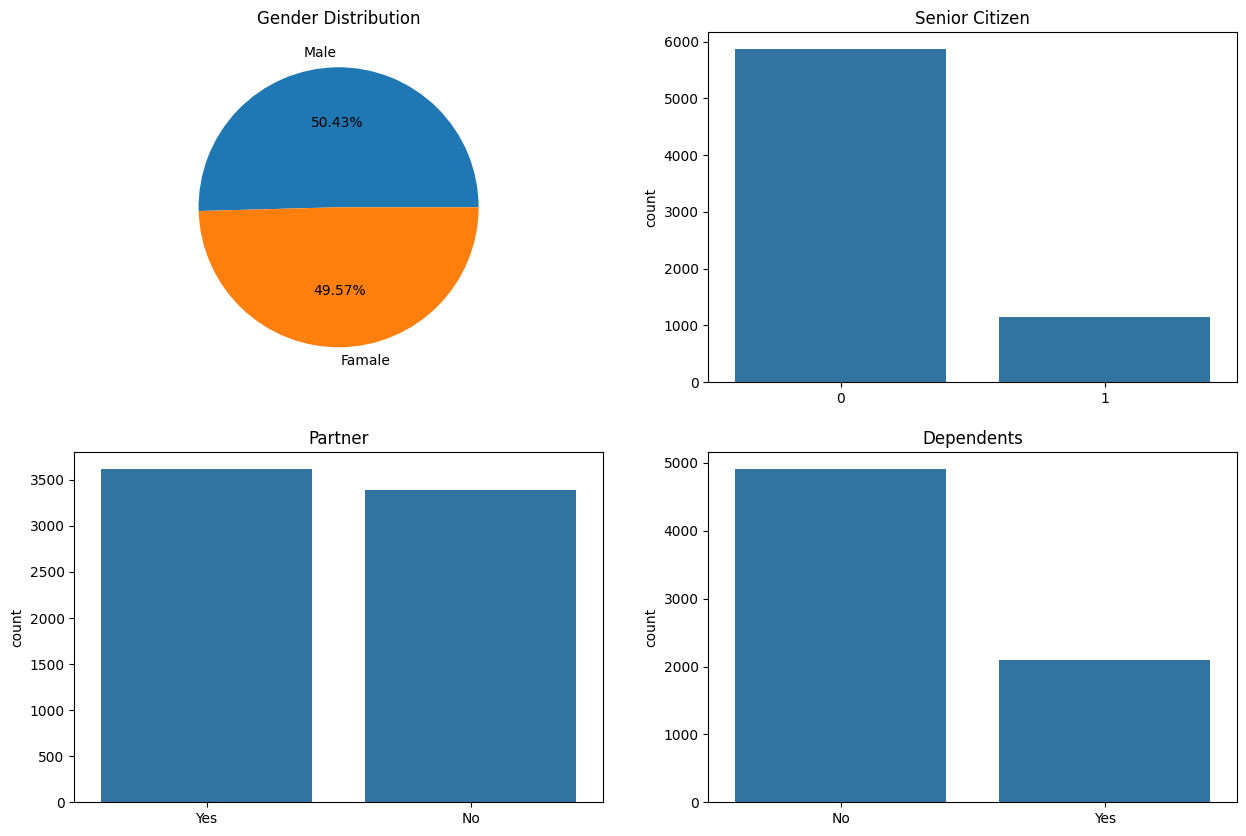

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0,0].pie(df['gender'].value_counts(), labels=['Male','Famale'], autopct='%1.2f%%')
ax[0,0].set_title('Gender Distribution')

sns.barplot(y = df['SeniorCitizen'].value_counts(), x = df['SeniorCitizen'].unique(),ax=ax[0,1]).set_title('Senior Citizen')
sns.barplot(y = df['Partner'].value_counts(), x = df['Partner'].unique(),ax=ax[1,0]).set_title('Partner')
sns.barplot(y = df['Dependents'].value_counts(), x = df['Dependents'].unique(),ax=ax[1,1]).set_title('Dependents')

These graphs shows the customer demographics. The number of males and famales is almost same, with few more males in dataset. Majority of them are not a senior citizen. Nearly 3500 customers have a partner. On the other hand 3400 of them don't have a partner. Majority of the customers don't have dependents, but still a significant number does have dependents.

From these graphs, we get know about the customers demographics, which help us to get an idea of their psychology based on their age, relationship status, and dependents.

### Services

Text(0.5, 1.0, 'Streaming Movies')

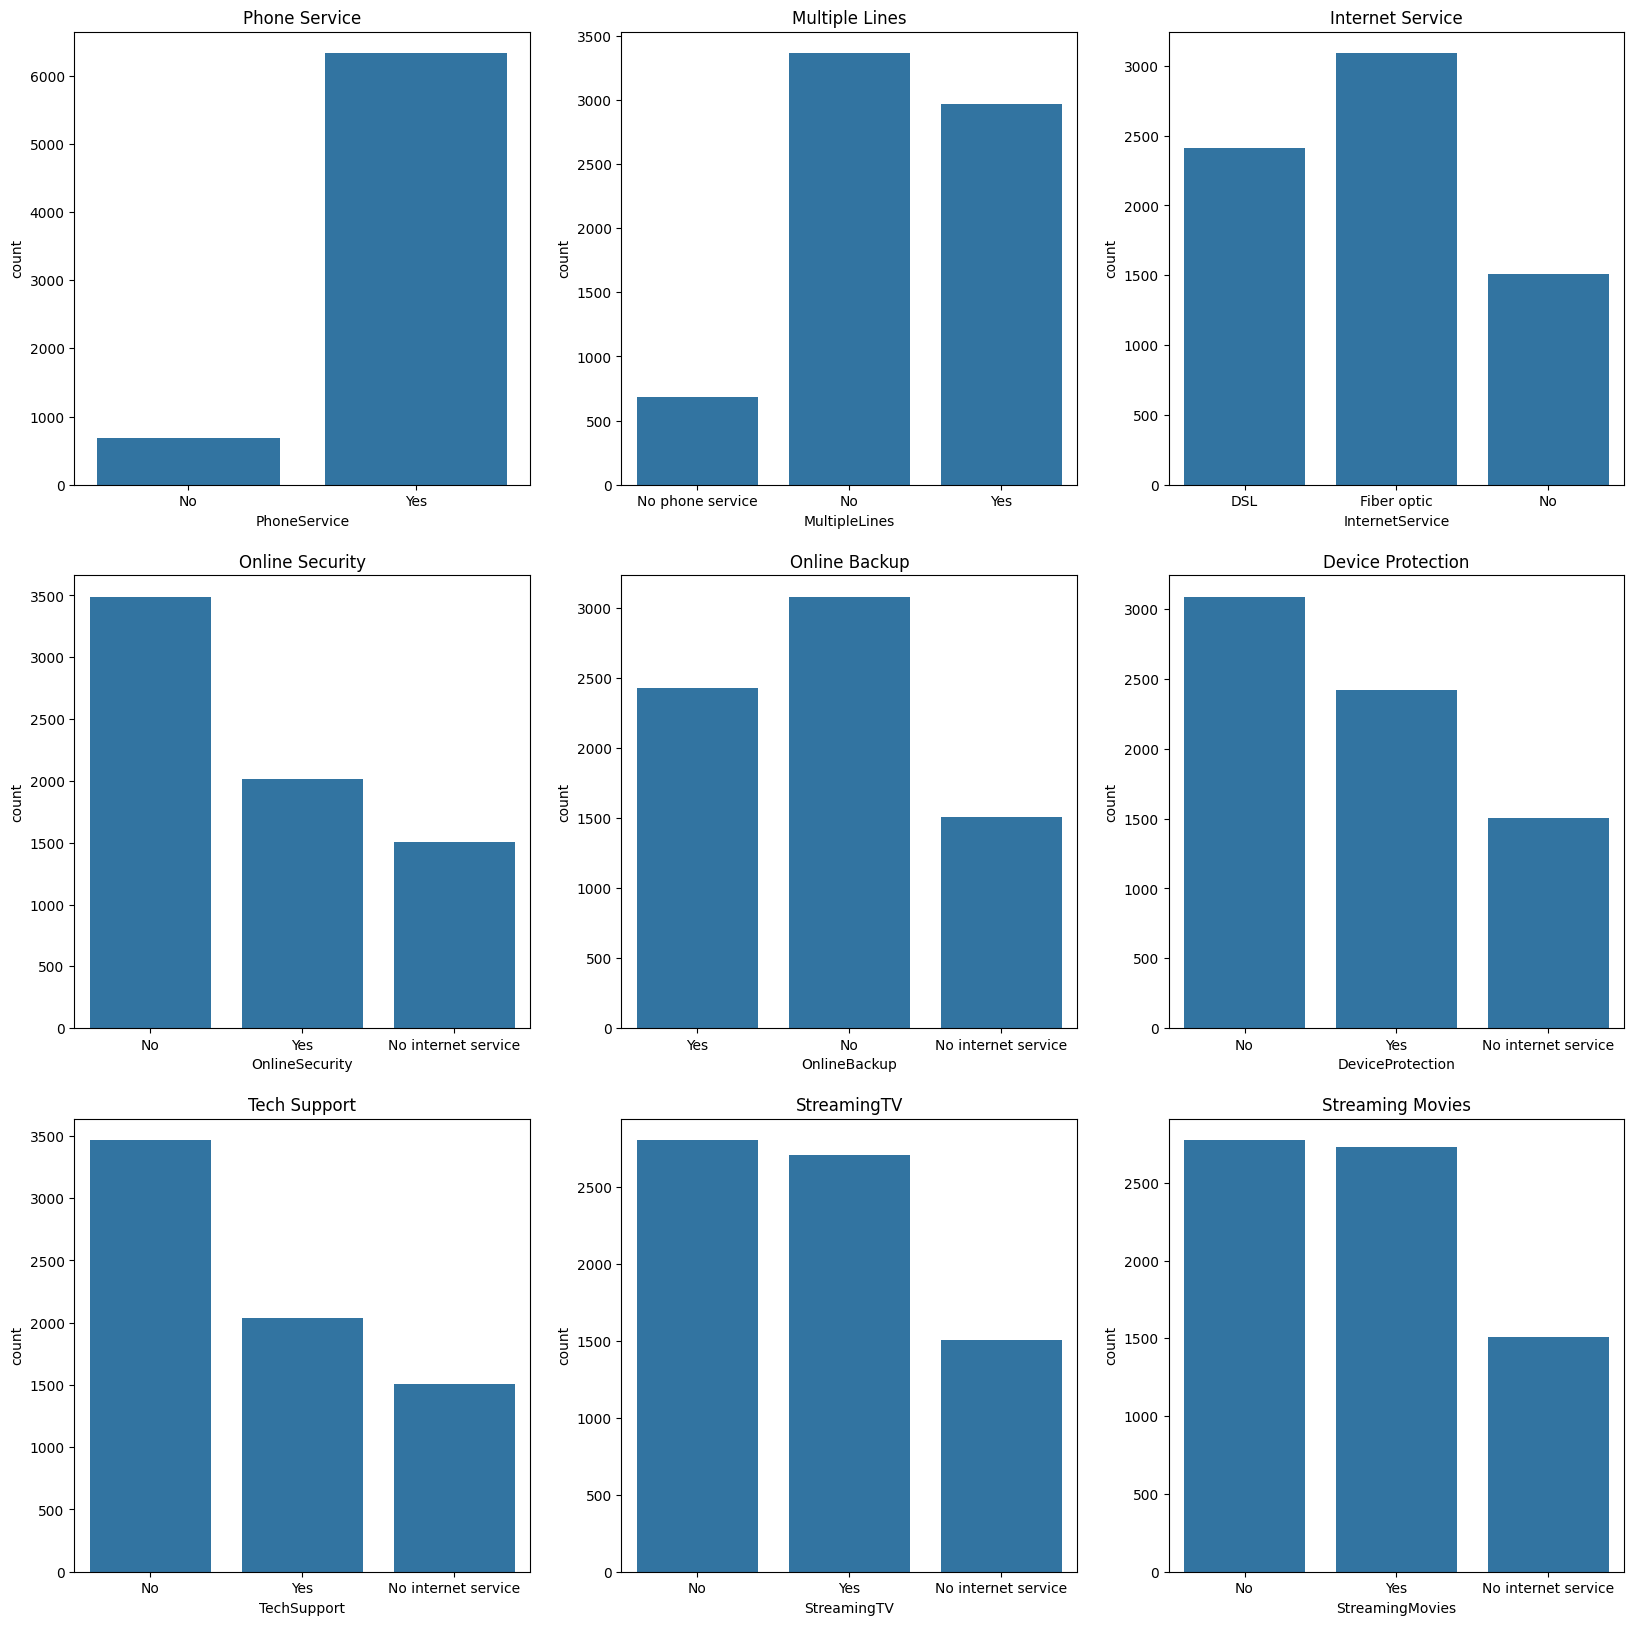

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.countplot(x = df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('StreamingTV')
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')

The above graphs visualizes the services taken by the customers from the telecom
company. Nearly 6000 customers have taken phone service. However, nearly half of the
customers have taken multiple lines from the company. Almost 5500, have taken Internet
Services from the company, where 3000 customers opted fibre optics and rest of them
opted DSL which could possible for business purposes. From these three major services related to telecom, the phone services and the internet services are the most popular services among the customers.


Moving on to other services, which include: Online Security, Online Backup, Device Protection, Tech Support, and Streaming Services. The online backup and device protection service is chosen by almost 2500 customers, highlighting their concern for device safety and data protection. Online security and tech support are opted for by around 2000 customers, making them the least popular services among customers. Streaming services, on the other hand, are the most popular, with more than 2500 customers choosing them.

From this, I conclude that apart from internet and phone services, streaming services are the most popular. Therefore, the company should prioritize improving its streaming services to better meet customer needs.

### Tenure and Contract

Text(0.5, 1.0, 'Contract type')

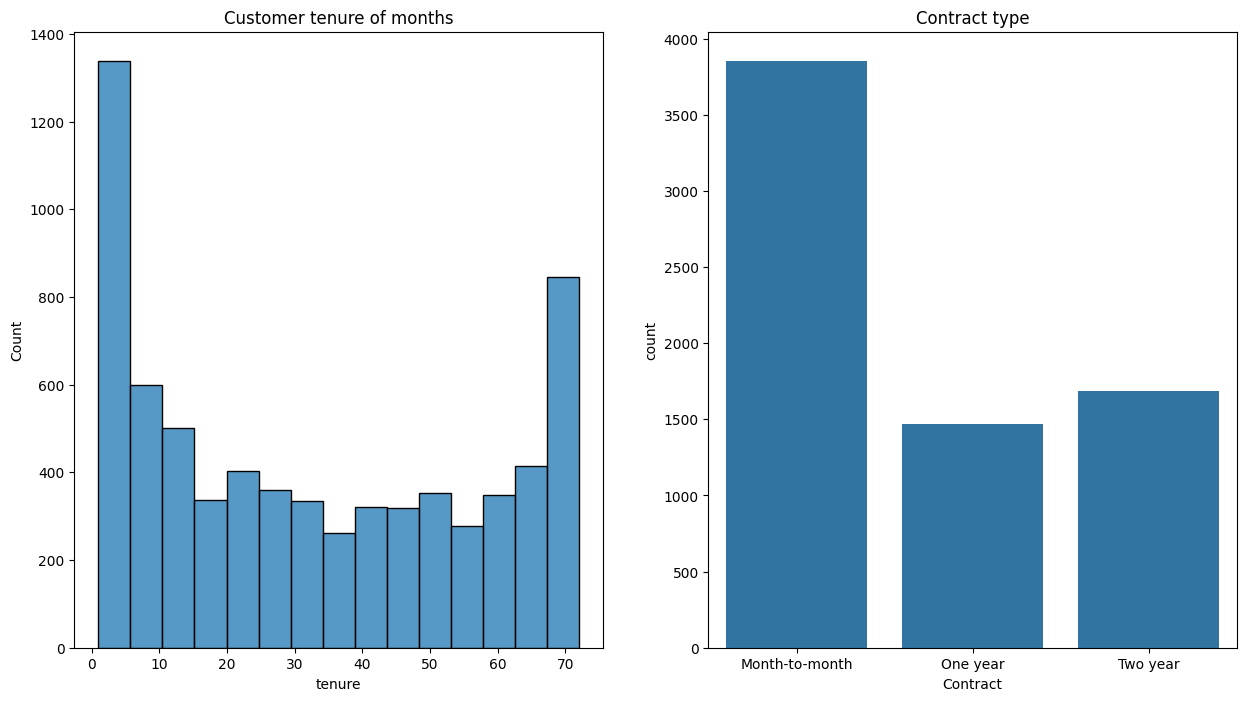

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0]).set_title('Customer tenure of months')
sns.countplot(x='Contract',data=df,ax=ax[1]).set_title('Contract type')

In above graphs we can see the distribution of customer tenure with the comapny
and the count of the type of contarct the company had with customer. Here, most if the
customers had tenure less than a month, and most of the customers had a month-to-month contract with the company. Therefore, the customers with shorter tenure have month-to-month contract with the company. In addtion to that, a significant number of
customers have tenure of nealry 70 months, which highlights the loyalty of the
customers towards the company. Moreover, after month-to-month contract, the second
most popular contract is two-year contract, which is opted by almost 1700 customers.
Rest of the customers have tenure between 1-5 years.

### Billing and charges

Text(0.5, 1.0, 'Total Charges')

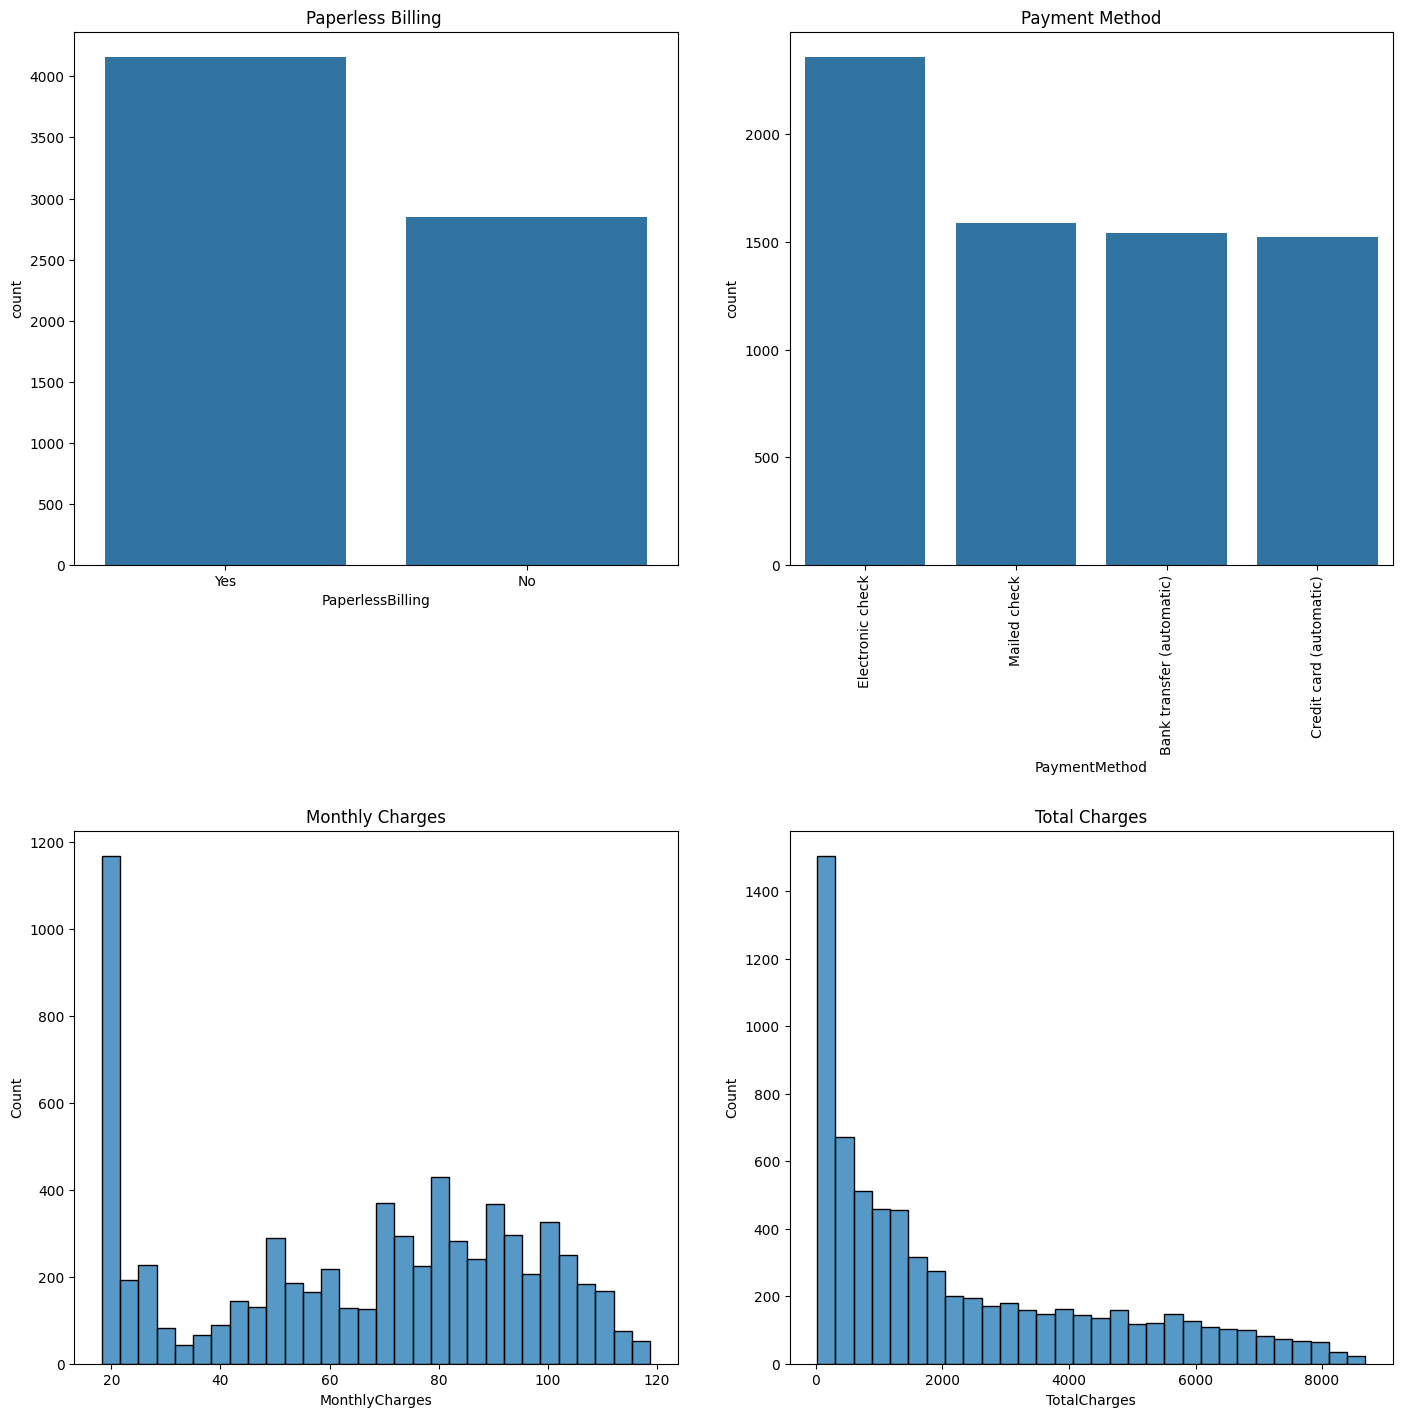

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(hspace=0.5)

sns.countplot(x='PaperlessBilling',data=df,ax=ax[0,0]).set_title('Paperless Billing ')
sns.countplot(x='PaymentMethod',data=df,ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)
sns.histplot(x='MonthlyCharges',data=df,ax=ax[1,0],bins=30).set_title('Monthly Charges')
sns.histplot(x='TotalCharges',data=df,ax=ax[1,1],bins=30).set_title('Total Charges')

These graphs shows the method of billing and the bill amounts. Most of the customers,
above 4000 prefer paperless billing, on the other hand a little bit over half of them pays through
electronic check. But still a significant number of customers prefer paper bills. Apart from
electronic checks, the other modes of payment accepted by the company includes -
mailed checks, bank transfer and credit cards. Nearly 5000 customers altogether prefer
these modes of payment.

Now, for the montly charges, huge number of customers pays near 20 dollars for the
montly services and majority of the customer having total charges less than 250 dollars.
However, there are considerable number of customers having monthly charges between
60 to 100 dollars and total charges between 250-750 dollars. What is interesing, If we look at
the total charges graph, we can see that some customers have a total bill more than
5000 and even 8000 as well. This could be possible, if the customer has a long tenure or
uses alot of services.

Now, I conclude that company mainly have customers with low charges, which means
company should focus on these customers by providing even more afforadable services.

### Churn

Text(0.5, 1.0, 'Churn Count')

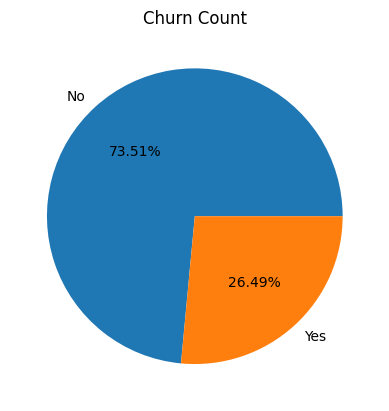

In [20]:
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].unique(), autopct='%1.2f%%')
plt.title('Churn Count')

In the dataset the number of churning customers is very less. Only 26.49% churnned from the telecom company. This could be a potential
proof, that company is quite good at retaning its customers.

**Now, I will look at the relationship between the independent variables and the target
variable.**

### Customer Demogrpahics and Churn

Text(0.5, 1.0, 'Churn')

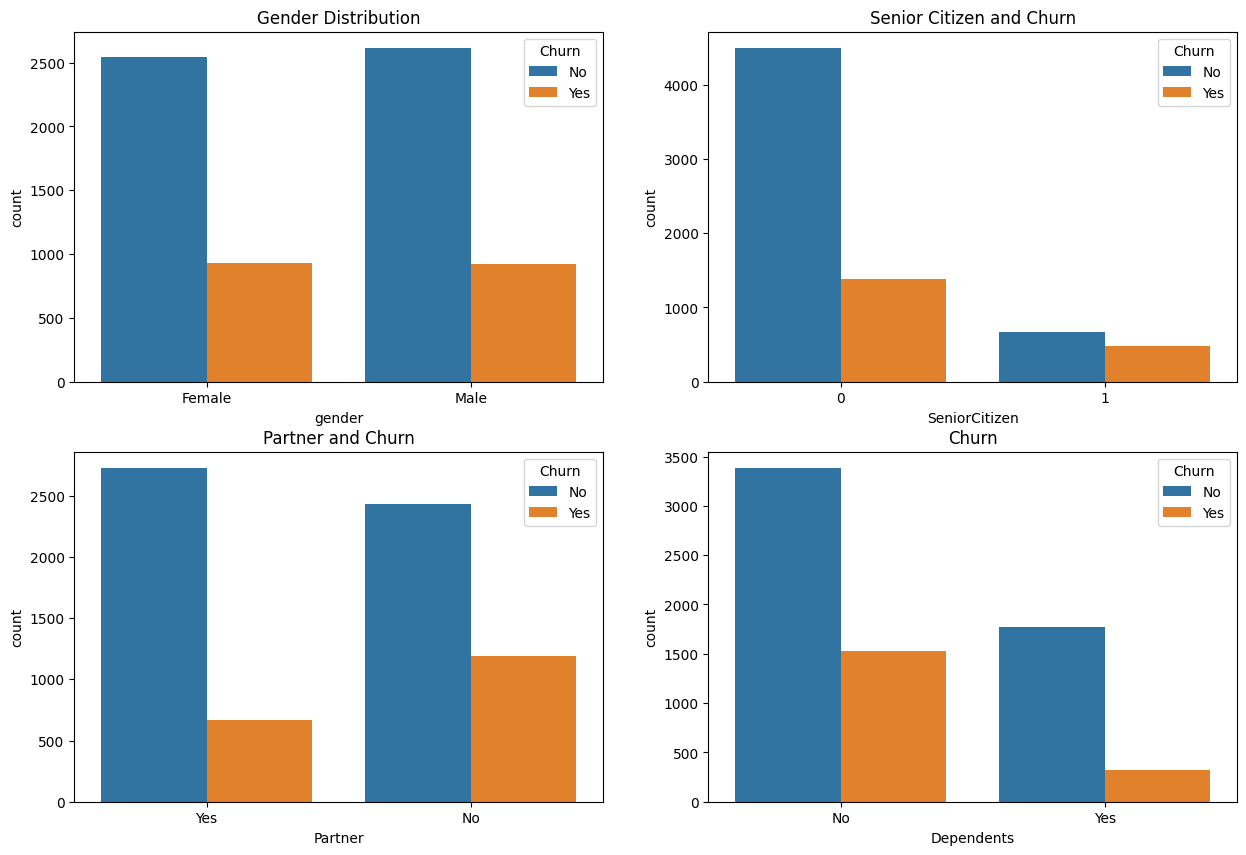

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='gender',hue='Churn',data=df,ax=ax[0,0]).set_title('Gender Distribution')
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,ax=ax[0,1]).set_title('Senior Citizen and Churn')
sns.countplot(x='Partner',hue='Churn',data=df,ax=ax[1,0]).set_title('Partner and Churn')
sns.countplot(x='Dependents',hue='Churn',data=df,ax=ax[1,1]).set_title('Churn')

From these graphs, we can get know about the relation between customer
demographics and customer churn. Both makes and females have equal number of
churn count, so there is not relation between gender and customer churn. However, the
senior citizens have a lesser churn count as compared to non senior citizens, which may
be because their age and they don't want to hasle with the process of changing the
telecom company. The customers with no partners have higher churn count as compared
to customers with partners. Similarly, customers with no dependents have higher churn
count as compared to customers with dependents.

From this I conclude that customers whom are single with no partner or have no
dependents have higher churn count and senior citizens have lower churn count.

### Services and churn

Text(0.5, 1.0, 'Streaming Movies and churn')

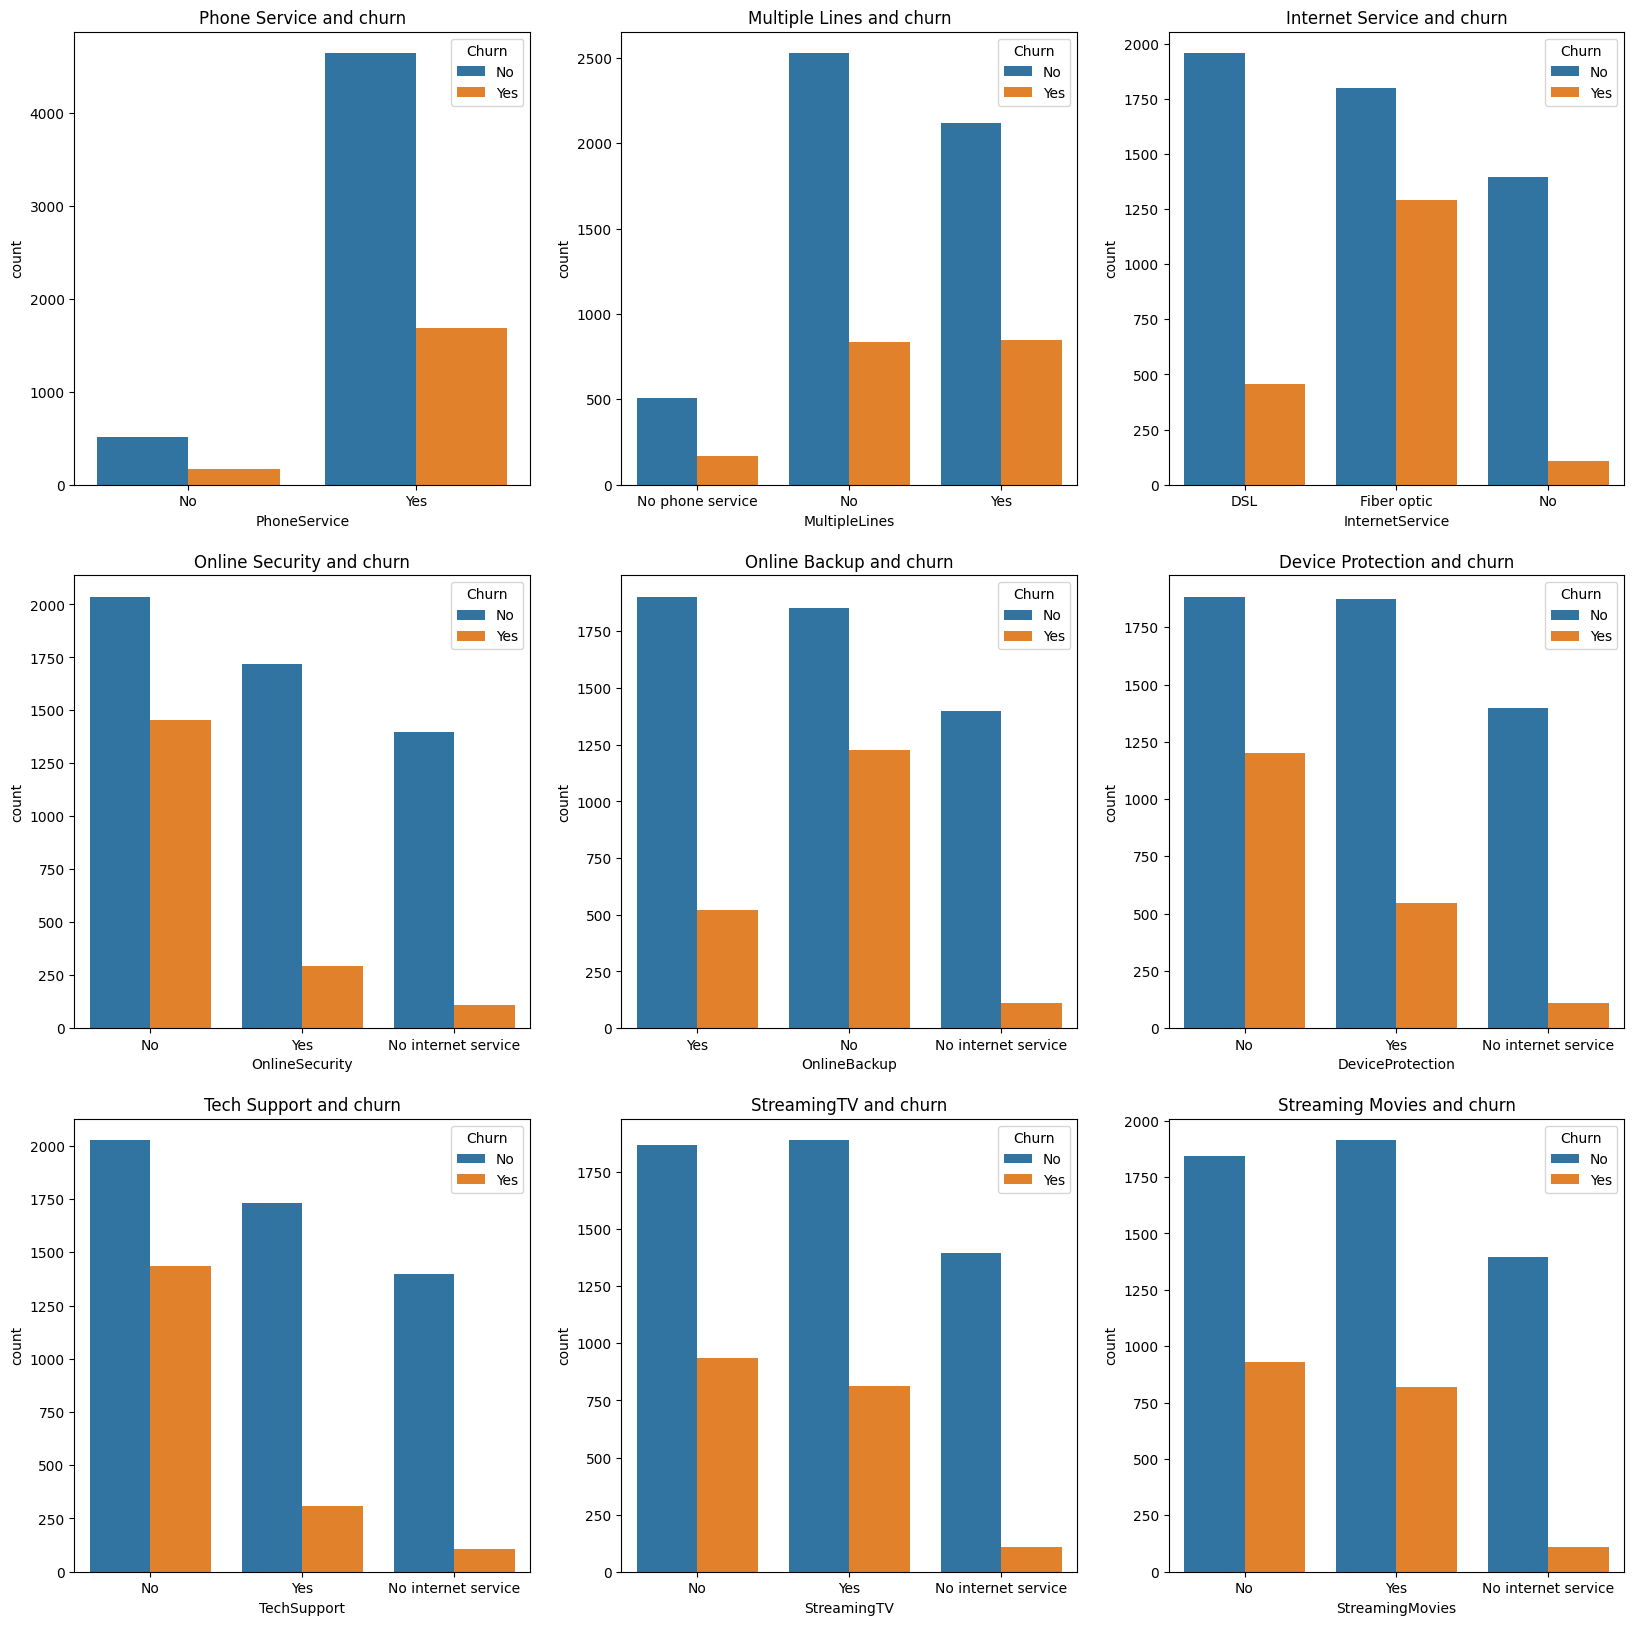

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.countplot(x = df['PhoneService'], ax=ax[0,0],hue=df['Churn']).set_title('Phone Service and churn')
sns.countplot(x = df['MultipleLines'], ax=ax[0,1],hue=df['Churn']).set_title('Multiple Lines and churn')
sns.countplot(x = df['InternetService'], ax=ax[0,2],hue=df['Churn']).set_title('Internet Service and churn')
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0],hue=df['Churn']).set_title('Online Security and churn')
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1],hue=df['Churn']).set_title('Online Backup and churn')
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2],hue=df['Churn']).set_title('Device Protection and churn')
sns.countplot(x = df['TechSupport'], ax=ax[2,0],hue=df['Churn']).set_title('Tech Support and churn')
sns.countplot(x = df['StreamingTV'], ax=ax[2,1],hue=df['Churn']).set_title('StreamingTV and churn')
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2],hue=df['Churn']).set_title('Streaming Movies and churn')

These graphs visualizes the relation between customer churn based on services opted by
the customer. In the phone and internet service, there is no relation between churn and
service opted, however the churn count is higher for the customers, who have taken
multiple lines. Coming to other services, where customers who have not taken Online
backup or Device Protection service has higher churn count, than those who have opted.
Moreover, the customers with streaming services have lower churn count as compared
to those who have not opted for it.

Therefore, certain services have relation with the customer churn, which are multiple
lines, Online Backup, Device Protection, and Streaming Services.

### Tenure/Contract and Churn

Text(0.5, 1.0, 'Contract type and Churn')

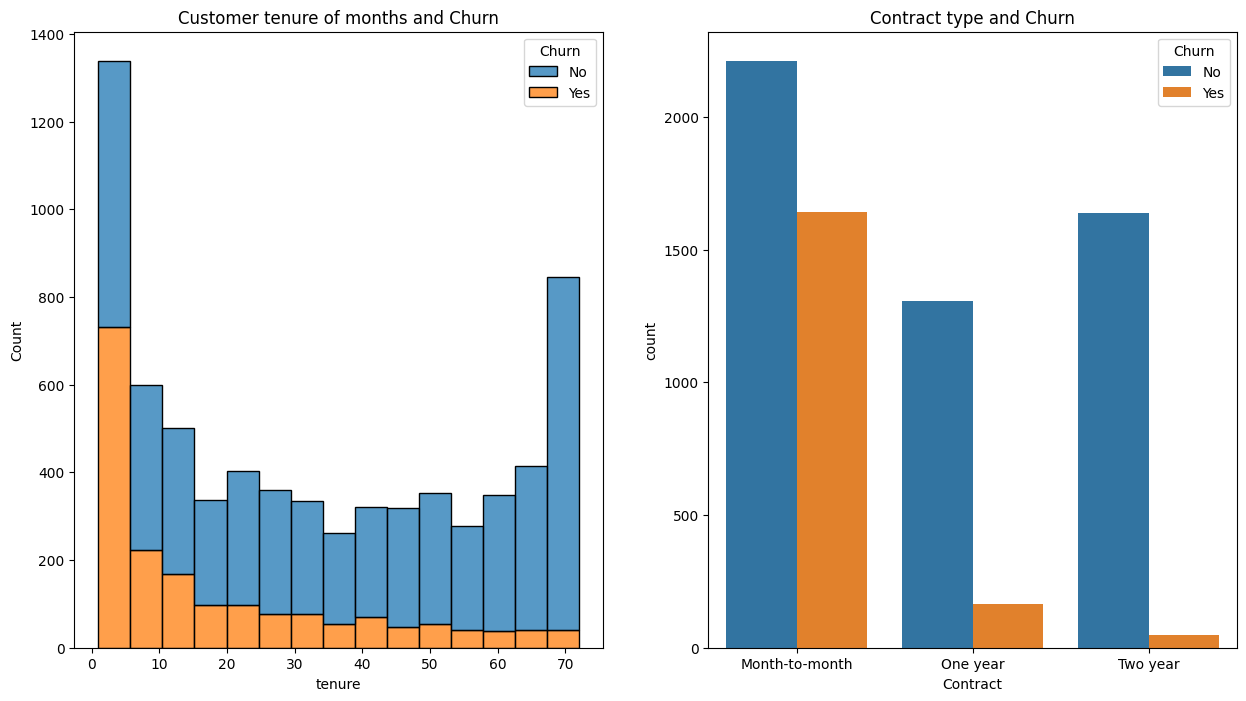

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0],hue='Churn',multiple='stack').set_title('Customer tenure of months and Churn')
sns.countplot(x='Contract',data=df,ax=ax[1],hue='Churn').set_title('Contract type and Churn')

From these graphs, we can get know about the relation between tenure, contract and churn. The customers with
shorter tenure or tenure less than 5 months have higher churn count. The churn count
decreases with increase in tenure. Moreover, the customers with month-to-month
contract have higher churn count as compared to those with one or two year contract
which also proves that customer who have longer contract with the company have lower
churn count.

### Billing/charges and Churn

Text(0.5, 1.0, 'Total Charges and Churn')

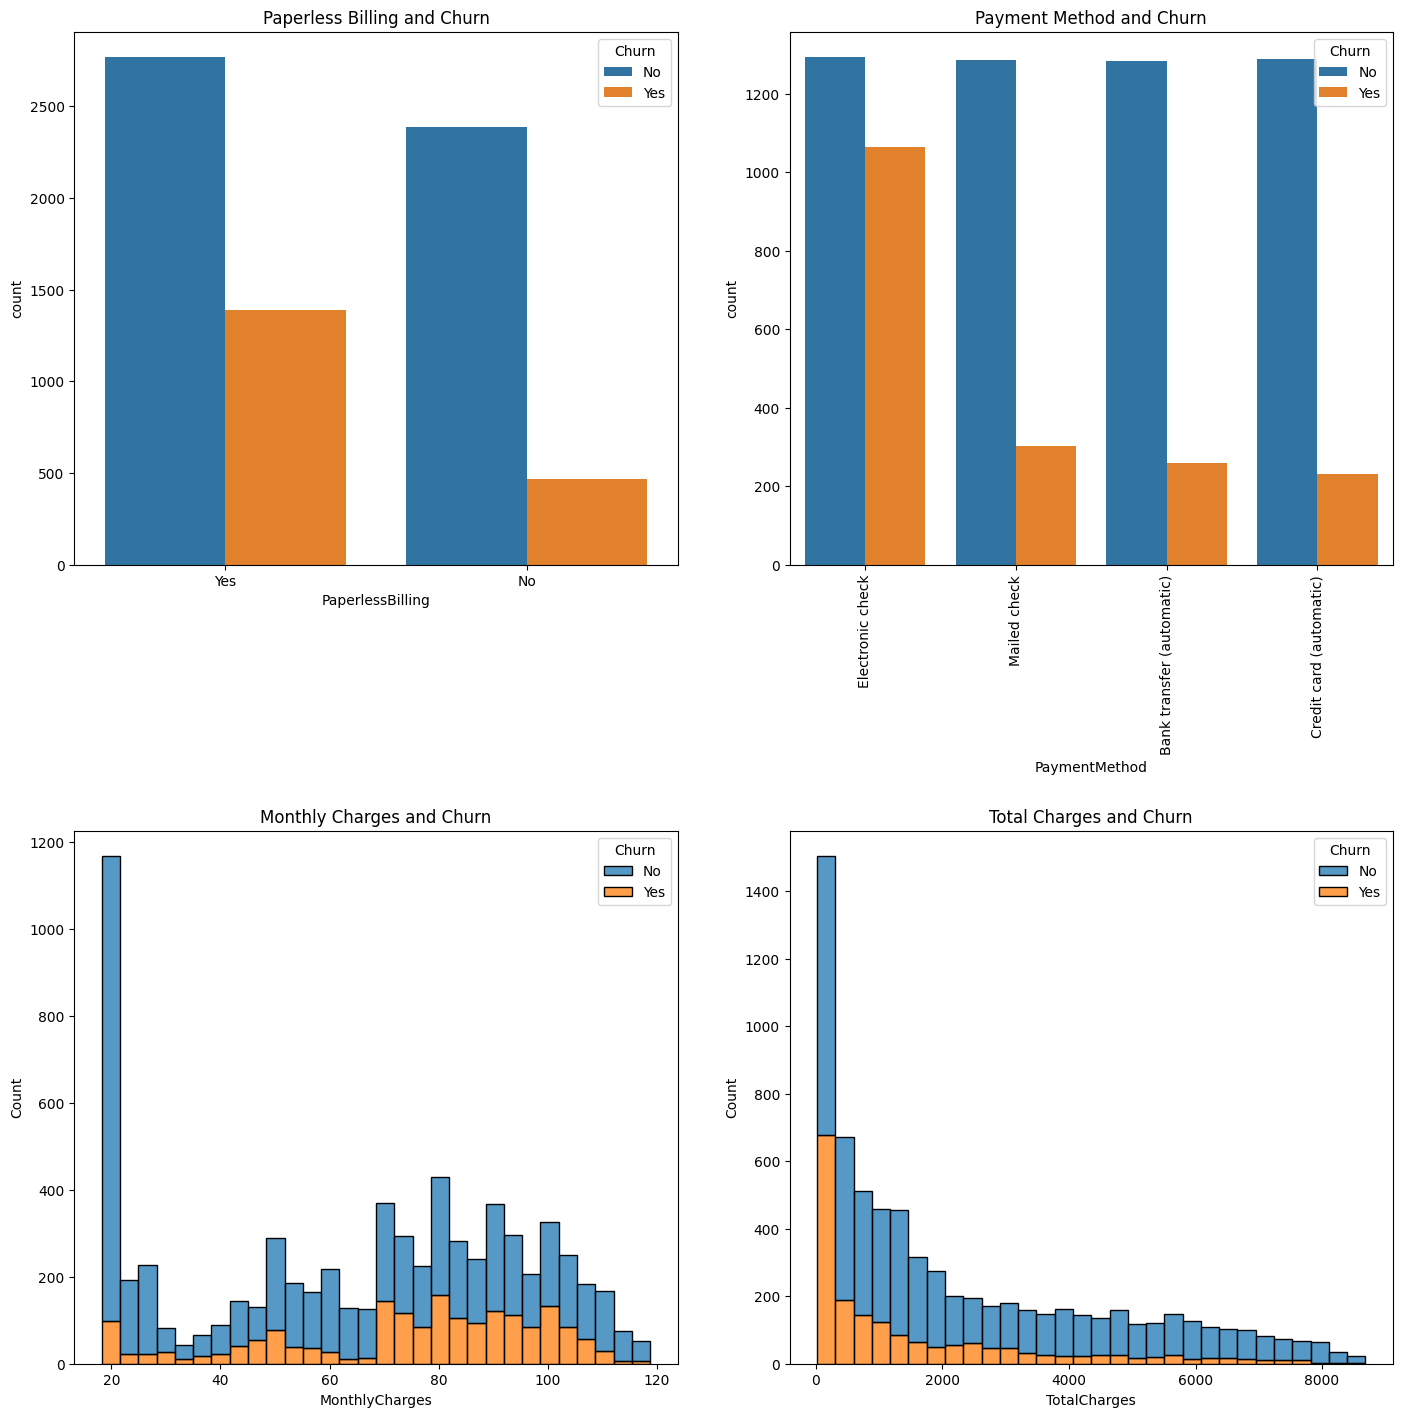

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(hspace=0.5)

sns.countplot(x='PaperlessBilling',data=df,ax=ax[0,0],hue='Churn').set_title('Paperless Billing and Churn')
sns.countplot(x='PaymentMethod',data=df,ax=ax[0,1],hue='Churn').set_title('Payment Method and Churn')
ax[0,1].xaxis.set_tick_params(rotation=90)
sns.histplot(x='MonthlyCharges',data=df,ax=ax[1,0],bins=30,hue='Churn',multiple='stack').set_title('Monthly Charges and Churn')
sns.histplot(x='TotalCharges',data=df,ax=ax[1,1],bins=30,hue='Churn',multiple='stack').set_title('Total Charges and Churn')

The paperless billing and payment method have not significant relation with the
customer churn. However, the montly and total charges do have a interesting relation
with the customer churn. The customers with higher monthly charges, above 70 months, have higher churn
count, which is quite obvious. But, the customers with higher total charges have lower
churn count. This could be possible, if the customer has a long
tenure or uses alot of services. Therefore, the company should focus on lowering the
monthly charges for the customers in order to reduce the churn count.

## Data Preprocessing Part 2

### Outliner removal

In [25]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
#Removing the outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Label Encoding 

In [26]:
import joblib
from sklearn.preprocessing import LabelEncoder

# kolumny do enkodowania
cols = df.columns[df.dtypes == 'object']

# słownik enkoderów
le_dict = {}

for col in cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    le_dict[col] = le
    print(col, df[col].unique(), '\n')

joblib.dump(le_dict, 'le.pkl')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



['le.pkl']

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
#Standardizing the data
sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

## Correlation Matrix Heatmap

<Axes: >

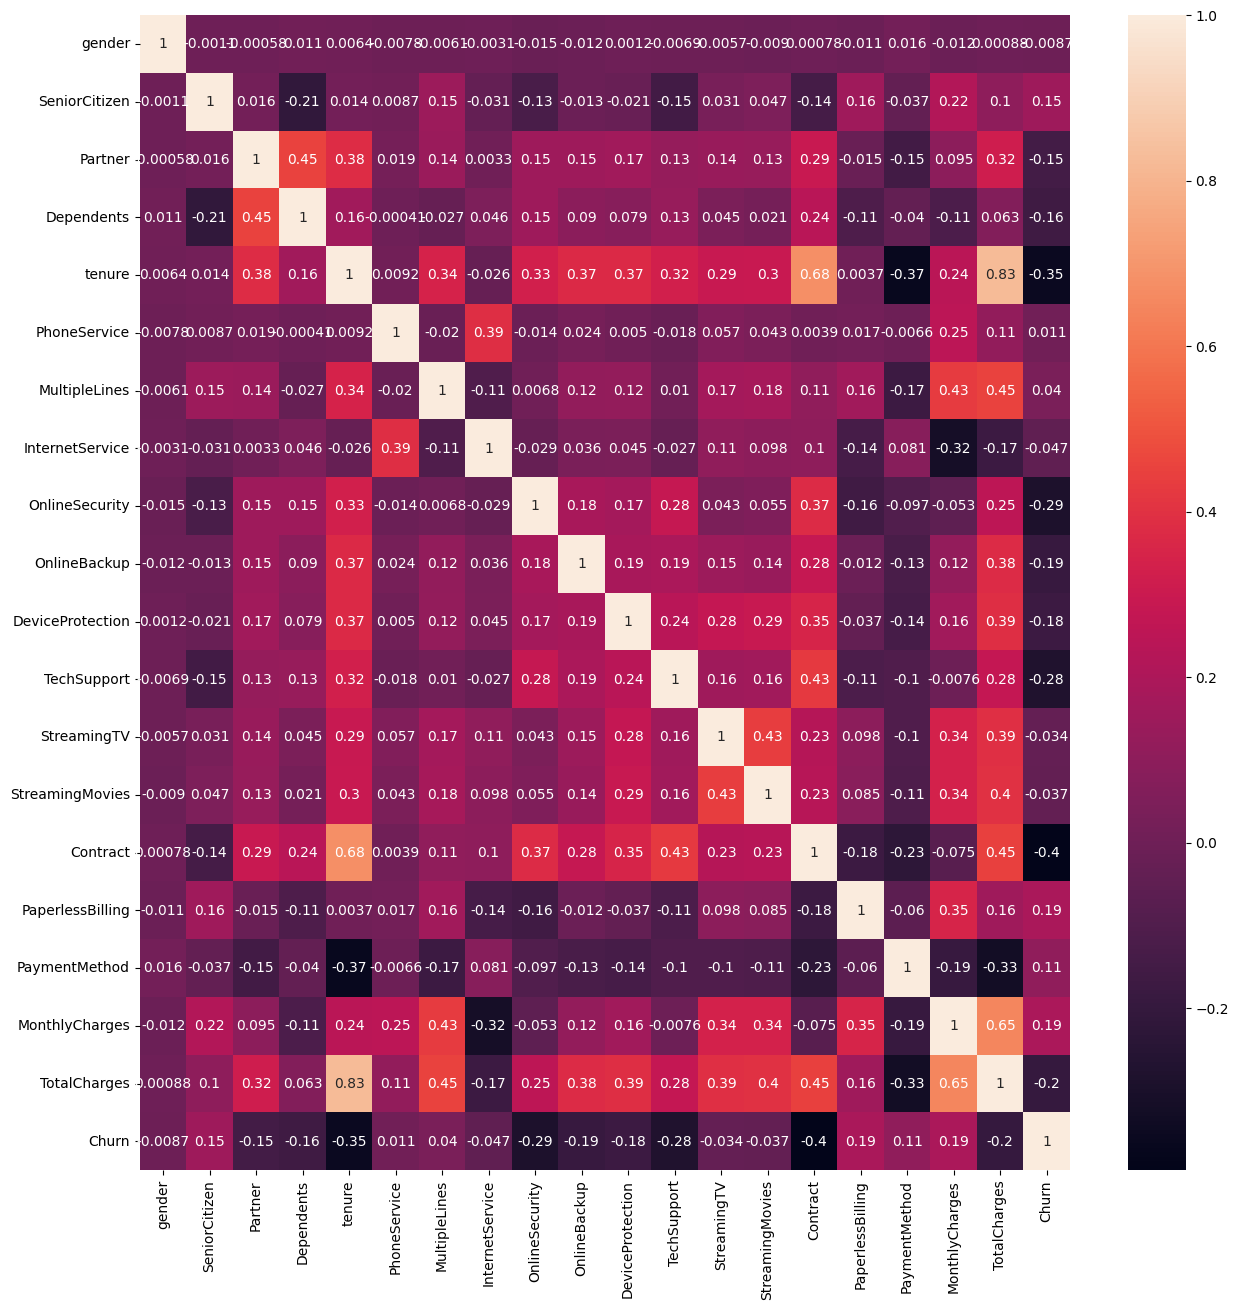

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

## Train test split

In [29]:
X=df.drop('Churn',axis=1)
y=df.Churn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building
I will be using the following models to predict the customer churn:
1. Decision Tree Classifier
2. Random Forest Classifier
3. K Nearest Neighbors Classifier
4. XGB Classifier


### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

### Hyperparameter Tuning using GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
 'max_depth': [2,4,6,8,10],
 'min_samples_leaf': [2,4,6,8,10],
 'min_samples_split': [2,4,6,8,10],
 'criterion': ['gini', 'entropy'],
 'random_state': [0,42]
}

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}


In [32]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)
dtree.fit(X_train,y_train)
print(dtree.score(X_test,y_test))
dtree_pred = dtree.predict(X_test)

0.7895863052781741


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

### Hyperparameter Tuning using GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
 'max_depth': [2,4,6,8,10],
 'min_samples_leaf': [2,4,6,8,10],
 'min_samples_split': [2,4,6,8,10],
 'criterion': ['gini', 'entropy'],
 'random_state': [0,42]
}


grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}


In [35]:
rfc = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
rfc_pred = rfc.predict(X_test)

0.8309557774607703


### K Nearest Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### Hyperparameter Tuning using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
 'n_neighbors': [2,4,6,8,10],
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}


In [38]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='uniform')
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

knn_pred = knn.predict(X_test)

0.7902995720399429


### XGB Classifier

In [39]:
import xgboost as xgb

xgb_cla = xgb.XGBClassifier()

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 75, 100, 150],
    'learning_rate': [0.01,0.05, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(estimator = xgb_cla, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}


In [41]:
xgb_cla = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, subsample = 1,random_state=42)
xgb_cla.fit(X_train,y_train)

print(xgb_cla.score(X_test,y_test))
xgb_pred = xgb_cla.predict(X_test)

0.8252496433666191


## Model Evaluation

### Confusion matrix

Text(0.5, 1.0, 'XGB Classifier Confusion Matrix')

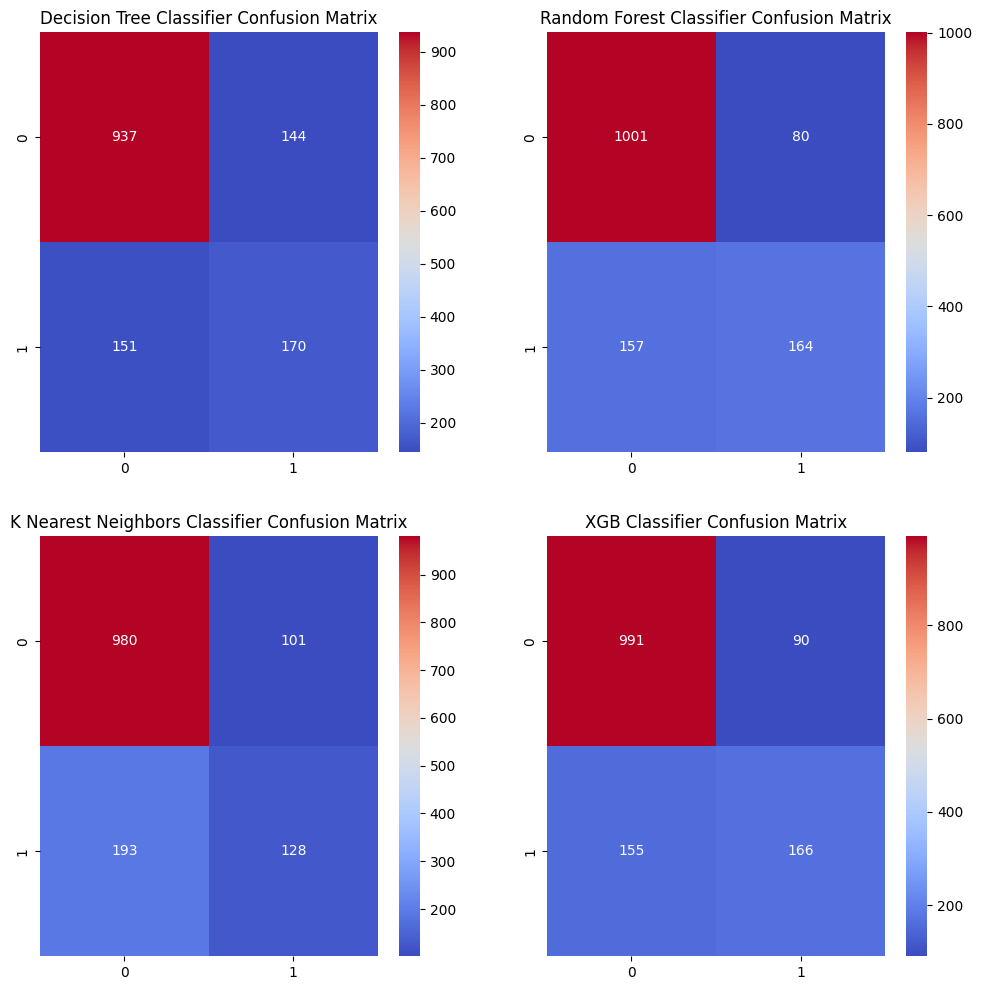

In [42]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,ax=ax[0,0],cmap='coolwarm',fmt="d").set_title('Decision Tree Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,ax=ax[0,1],cmap='coolwarm',fmt="d").set_title('Random Forest Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,ax=ax[1,0],cmap='coolwarm',fmt="d").set_title('K Nearest Neighbors Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,xgb_pred),annot=True,ax=ax[1,1],cmap='coolwarm',fmt="d").set_title('XGB Classifier Confusion Matrix')

The confusion matrix heatmaps visulaizes the true positive and true negative results from
the machine learning model. Here, in the above confusion matrix, when see that the
**Random Forest Classifier** has the highest true positive and true negative results, with
considerbly less false positive and false negative results. **Therefore, the Random Forest
Classifier is the best model for predicting the customer churn.**

### Classification Report

In [43]:
from sklearn.metrics import classification_report

print('Decision Tree Classification Report: \n',classification_report(y_test,dtree_pred))
print('Random Forest Classification Report: \n',classification_report(y_test,rfc_pred))
print('K Nearest Neighbors Classification Report: \n',classification_report(y_test,knn_pred))
print('XGB Classification Report: \n',classification_report(y_test,xgb_pred))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1081
           1       0.54      0.53      0.54       321

    accuracy                           0.79      1402
   macro avg       0.70      0.70      0.70      1402
weighted avg       0.79      0.79      0.79      1402

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1081
           1       0.67      0.51      0.58       321

    accuracy                           0.83      1402
   macro avg       0.77      0.72      0.74      1402
weighted avg       0.82      0.83      0.82      1402

K Nearest Neighbors Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1081
           1       0.56      0.40      0.47       321

    accuracy                           0.79      1402
   ma

### Distribution Plot

<Axes: title={'center': 'XGB'}, xlabel='Churn', ylabel='Density'>

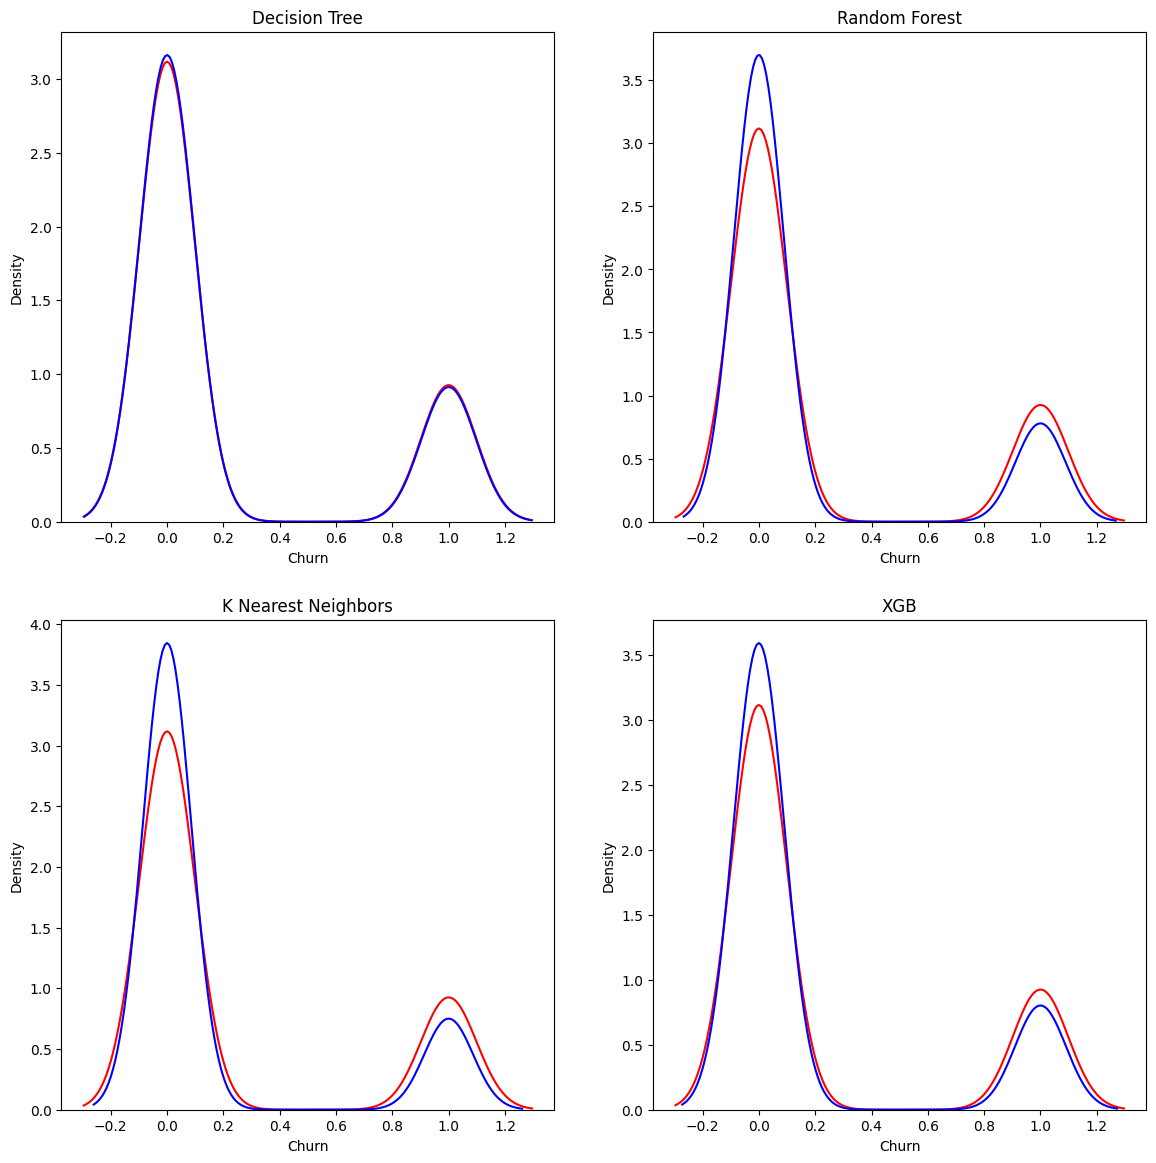

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

sns.kdeplot(y_test,ax=ax[0,0],label='Actual Value',color="r").set_title('Decision Tree')
sns.kdeplot(dtree_pred,ax=ax[0,0],label='Fitted Values',color="b")

sns.kdeplot(y_test,ax=ax[0,1],label='Actual Value',color="r").set_title('Random Forest')
sns.kdeplot(rfc_pred,ax=ax[0,1],label='Fitted Values',color="b")

sns.kdeplot(y_test,ax=ax[1,0],label='Actual Value',color="r").set_title('K Nearest Neighbors')
sns.kdeplot(knn_pred,ax=ax[1,0],label='Fitted Values',color="b")

sns.kdeplot(y_test,ax=ax[1,1],label='Actual Value',color="r").set_title('XGB')
sns.kdeplot(xgb_pred,ax=ax[1,1],label='Fitted Values',color="b")

### Model Metrics

Text(0.5, 1.0, 'F1 Score')

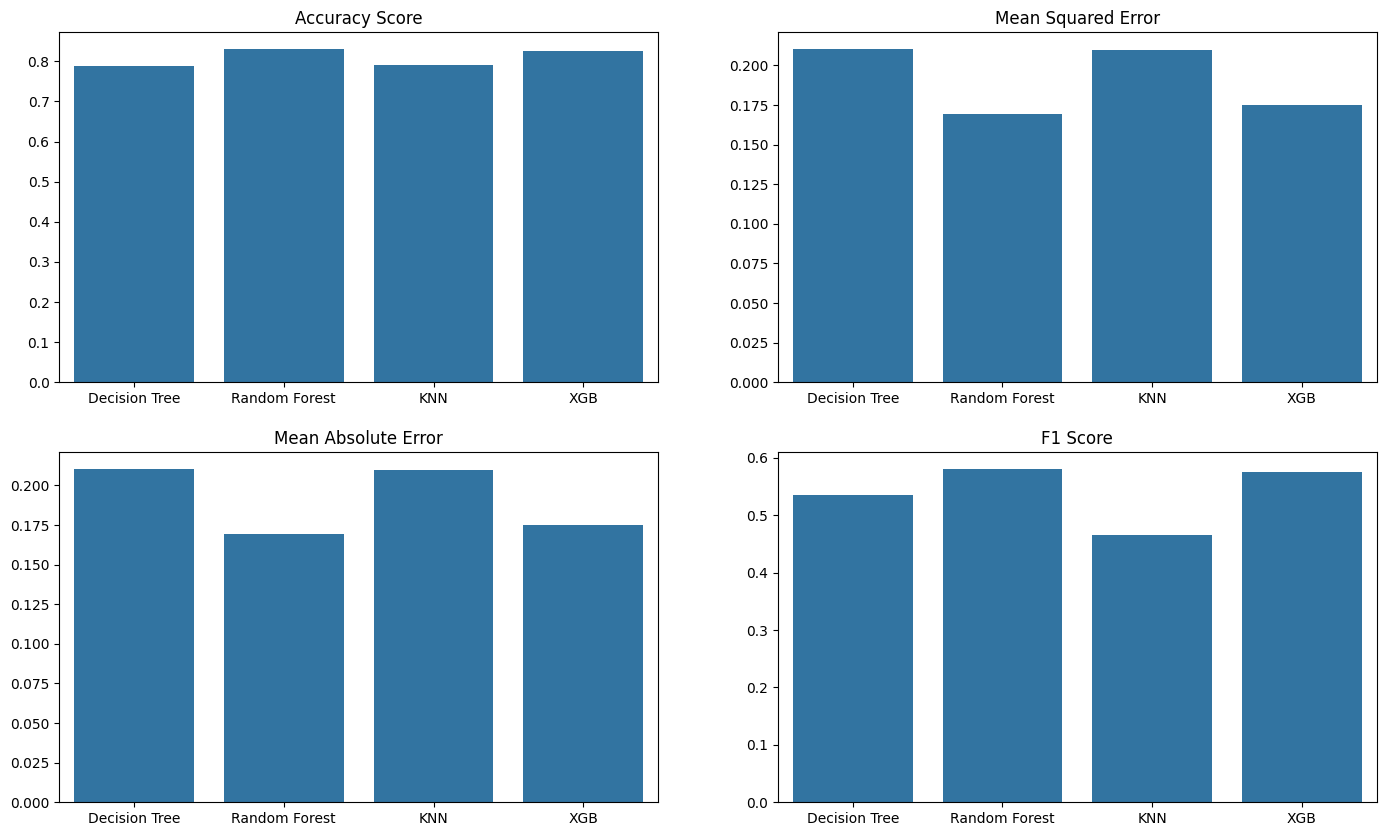

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,f1_score


fig, ax = plt.subplots(2,2, figsize=(17, 10))

sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'XGB'], y = [accuracy_score(y_test, dtree_pred), accuracy_score(y_test, rfc_pred), accuracy_score(y_test, knn_pred),accuracy_score(y_test, xgb_pred)], ax=ax[0,0]).set_title('Accuracy Score')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'XGB'], y = [mean_squared_error(y_test, dtree_pred), mean_squared_error(y_test, rfc_pred), mean_squared_error(y_test, knn_pred),mean_squared_error(y_test, xgb_pred)], ax=ax[0,1]).set_title('Mean Squared Error')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'XGB'], y = [mean_absolute_error(y_test, dtree_pred), mean_absolute_error(y_test, rfc_pred), mean_absolute_error(y_test, knn_pred),mean_absolute_error(y_test, xgb_pred)], ax=ax[1,0]).set_title('Mean Absolute Error')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'XGB'], y = [f1_score(y_test, dtree_pred), f1_score(y_test, rfc_pred), f1_score(y_test, knn_pred),f1_score(y_test, xgb_pred)], ax=ax[1,1]).set_title('F1 Score')

These graphs compares the models based on the metrics such as accuracy score, mean squared error, mean absolute error and f1 score. The Random Forest Classifier has the highest accuracy score and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Random Forest Classifier is a good fit for predicting the customer churn.

## Future Importances 

Text(0.5, 1.0, 'XGB Importances')

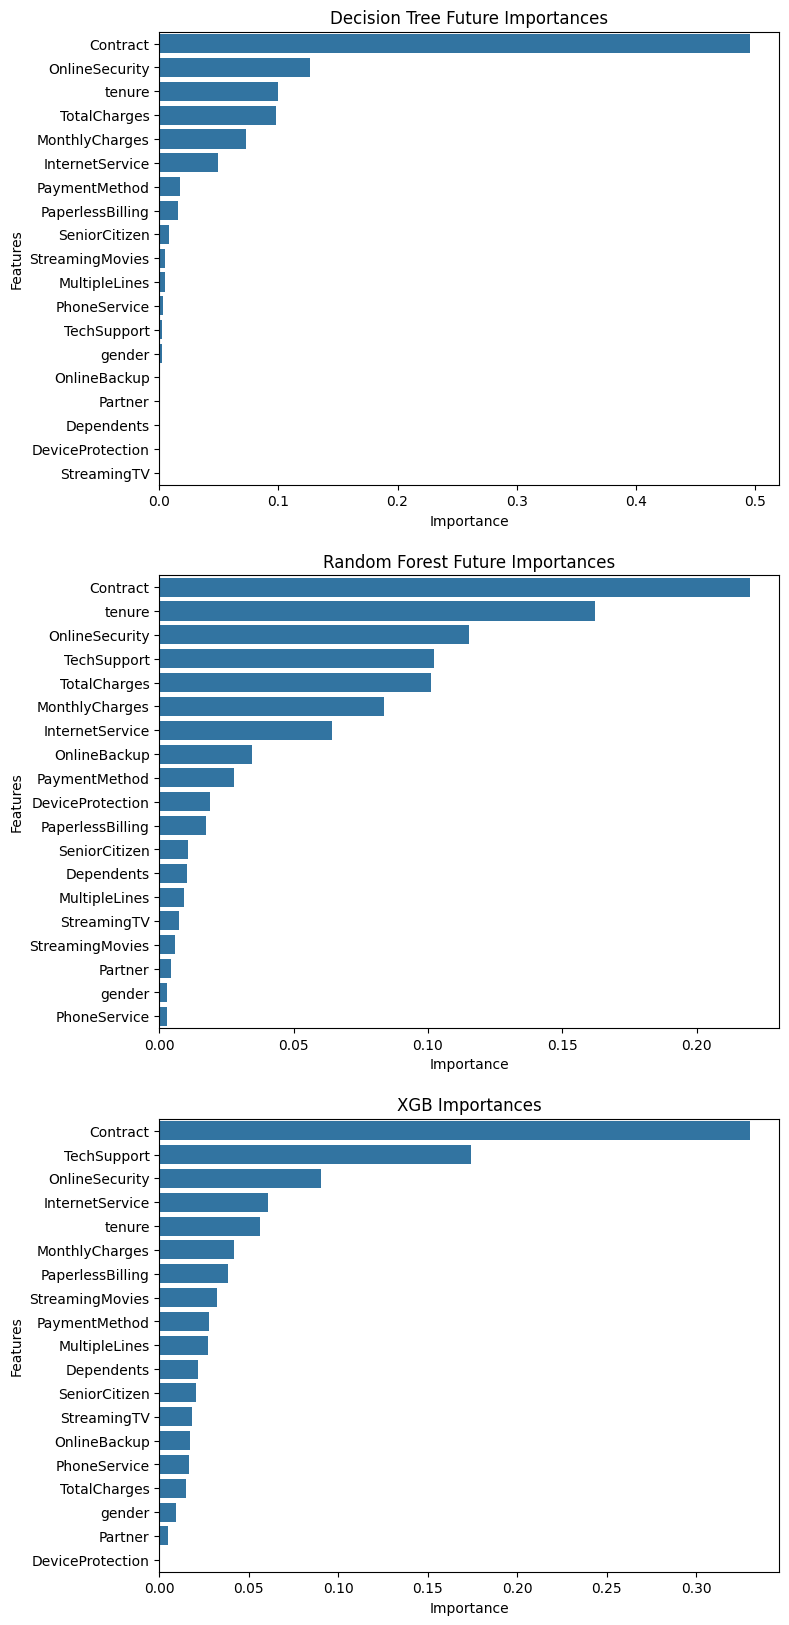

In [46]:
fig, ax = plt.subplots(3, 1, figsize=(8, 20))
# Decision Tree Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Future Importances')

feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Future Importances')

feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': xgb_cla.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[2]).set_title('XGB Importances')

From both the models, it is clear that the contract, tenure and Online Security are
the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.

## Model Explainability with SHAP

To better understand how the XGB model makes predictions, we use **SHAP (SHapley Additive exPlanations)**. SHAP values help explain the contribution of each feature to individual predictions.

We generate:
- A **summary plot** to show the most impactful features across the dataset,
- A **waterfall plot** to visualize the contribution of features for a single prediction.

This enhances model interpretability and helps build trust with stakeholders.

In [47]:
explainer = shap.Explainer(xgb_cla, X_test)
shap_values = explainer(X_test)

### Summary plot

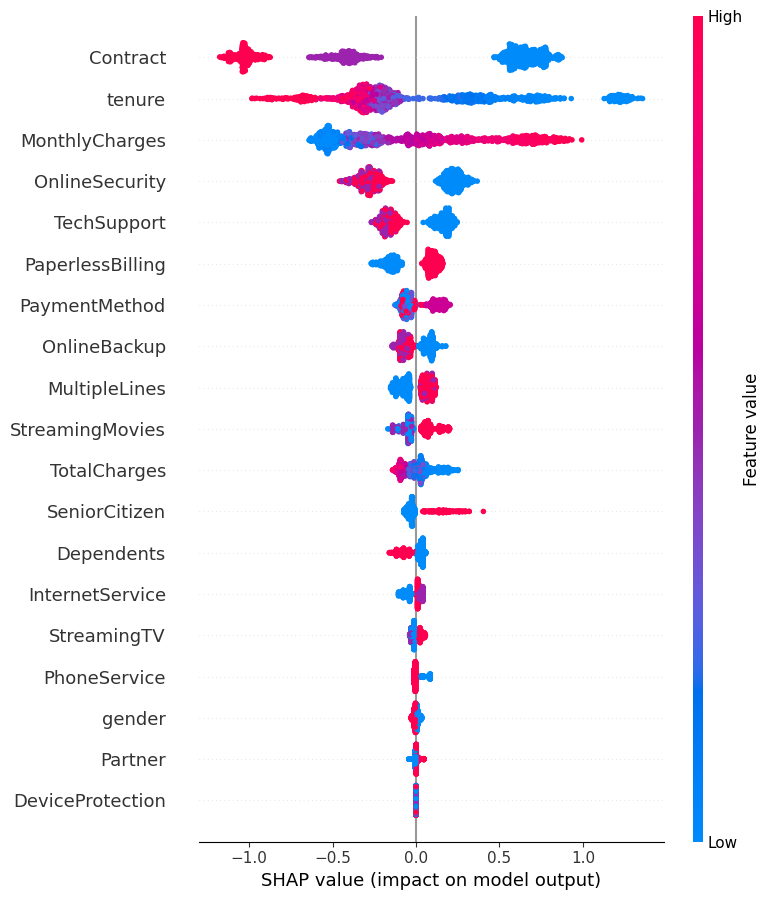

In [48]:
shap.summary_plot(shap_values, X_test)

### Graph of the value of one prediction (e.g. first customer)

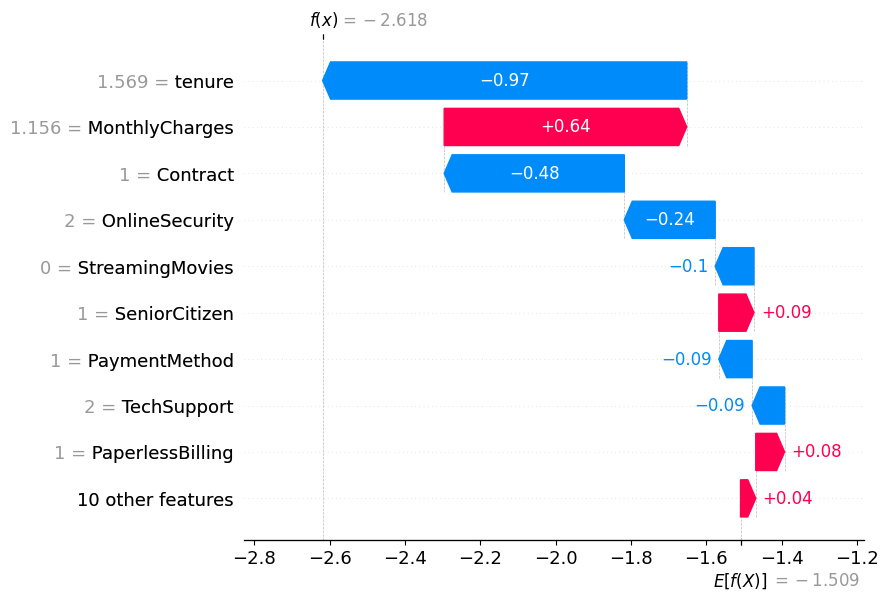

In [49]:
shap.plots.waterfall(shap_values[0])

### Feature dependency graph

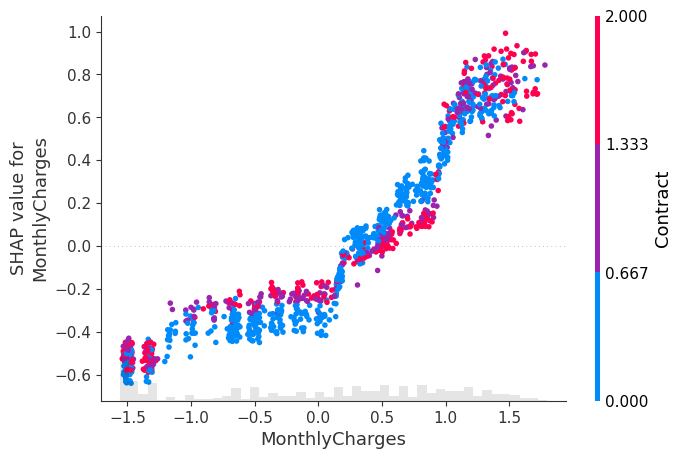

In [50]:
shap.plots.scatter(shap_values[:, "MonthlyCharges"], color=shap_values)

## Exporting Best Model and Scaler

In [51]:
import joblib
joblib.dump(rfc, 'xgb.pkl')

['rfc.pkl']

## Conclusion

From the exploratory data analysis, I came to know that, the senior citizens have lower
churn count whereas the customers who are single or don't have dependents have
higher churn count. In addition to that, customers are more satified with the streaming
services than other services such as Online backup and Device Protection, which has
resulted in lower churn count in customer with streaming services than the other services.

The tenure have an inverse relation with churn count, where customer with tenure
shorter than 5 months have higher churn count. Moreover, the customers with month-to-month contract have higher churn count as compared to those with one or two year contract which also proves that customer who have longer contract with the company
have lower churn count.

It has been observed that the customers with higher monthly charges and lower total
charges have higher churn count. Therefore, the company should focus on lowering the
monthly charges for the customers in order to reduce the churn count. From the feature
importance, it is clear that the tenure, contract, monthly charges, and total charges are
the most important features for predicting the customer churn. Therefore, the company
should focus on these features to reduce the customer churn.

Coming to the Machine Learning models, I have used four models - Decision Tree
Classifier, Random Forest Classifier, K Nearest Neighbors Classifier and XGBoost Classifier. The Random
Forest Classifier has the highest accuracy round to 82% and F1 Score, and lowest mean
squared error, mean absolute error. Therefore, the **Random Forest Classifier** is a good fit
for predicting the customer churn.